# CNN on mnist with convolution visualization

This is heavily based on keras' example : https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py

This is for the **keras v1** api

In [1]:
import os
os.environ['THEANO_FLAGS']='mode=FAST_RUN,device=gpu,floatX=float32'
# This gives a 'perform' error in compile
#os.environ['THEANO_FLAGS']='mode=FAST_COMPILE,device=gpu1,floatX=float32'
#os.environ['THEANO_FLAGS']='device=gpu0'

#os.environ['KERAS_BACKEND'] = 'tensorflow'
#os.environ['THEANO_FLAGS']='mode=FAST_COMPILE,device=cpu,floatX=float32'

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from __future__ import absolute_import
from __future__ import print_function
import pylab as pl
import matplotlib.cm as cm
import numpy as np
np.random.seed(1337) # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

%matplotlib inline

'''
    Train a simple convnet on the MNIST dataset.

    Run on GPU: THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatX=float32 python mnist_cnn.py

    Get to 99.25% test accuracy after 12 epochs (there is still a lot of margin for parameter tuning).
    16 seconds per epoch on a GRID K520 GPU.
'''

/home/julien/dev/venv/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: GeForce GTX 960 (CNMeM is disabled, cuDNN 5004)


'\n    Train a simple convnet on the MNIST dataset.\n\n    Run on GPU: THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatX=float32 python mnist_cnn.py\n\n    Get to 99.25% test accuracy after 12 epochs (there is still a lot of margin for parameter tuning).\n    16 seconds per epoch on a GRID K520 GPU.\n'

In [3]:
import theano
print(theano.config.device)

gpu


In [4]:
np.set_printoptions(precision=5, suppress=True)

In [5]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


label :  [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


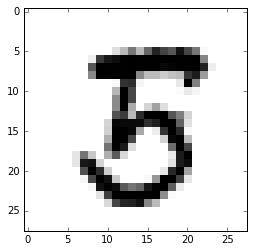

In [6]:
i = 4600
pl.imshow(X_train[i, 0], interpolation='nearest', cmap=cm.binary)
print("label : ", Y_train[i,:])

In [7]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=X_train.shape[1:])) 
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(32, 3, 3))

convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [8]:
# Uncomment to visualize
#from IPython.display import SVG
#from keras.utils.visualize_util import model_to_dot
#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
WEIGHTS_FNAME = 'mnist_cnn_weights_v1.hdf'
if True and os.path.exists(WEIGHTS_FNAME):
    # Just change the True to false to force re-training
    print('Loading existing weights')
    model.load_weights(WEIGHTS_FNAME)
else:
    batch_size = 128
    nb_epoch = 12
    model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
              verbose=1, validation_data=(X_test, Y_test))
    model.save_weights(WEIGHTS_FNAME)
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s - loss: 0.2552 - acc: 0.9230 - val_loss: 0.0551 - val_acc: 0.9827
Epoch 2/12
60000/60000 [==============================] - 7s - loss: 0.0951 - acc: 0.9710 - val_loss: 0.0409 - val_acc: 0.9859
Epoch 3/12
60000/60000 [==============================] - 7s - loss: 0.0722 - acc: 0.9778 - val_loss: 0.0353 - val_acc: 0.9884
Epoch 4/12
60000/60000 [==============================] - 7s - loss: 0.0585 - acc: 0.9825 - val_loss: 0.0320 - val_acc: 0.9895
Epoch 5/12
60000/60000 [==============================] - 7s - loss: 0.0502 - acc: 0.9845 - val_loss: 0.0315 - val_acc: 0.9894
Epoch 6/12
60000/60000 [==============================] - 7s - loss: 0.0429 - acc: 0.9863 - val_loss: 0.0328 - val_acc: 0.9892
Epoch 7/12
60000/60000 [==============================] - 7s - loss: 0.0400 - acc: 0.9874 - val_loss: 0.0318 - val_acc: 0.9895
Epoch 8/12
60000/60000 [==============================] - 7s 

/home/julien/dev/venv/local/lib/python2.7/site-packages/keras/models.py:426: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


Test score: 0.0294058109636
Test accuracy: 0.9914


In [10]:
print(model.predict(X_test[1:5]))
print(Y_test[1:5])

[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
[[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [11]:
Y_pred = model.predict(X_test)
# Convert one-hot to index
y_pred = np.argmax(Y_pred, axis=1)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       1.00      1.00      1.00      1135
          2       0.99      0.99      0.99      1032
          3       0.99      0.99      0.99      1010
          4       0.99      0.99      0.99       982
          5       0.98      0.99      0.99       892
          6       0.99      0.99      0.99       958
          7       0.99      0.99      0.99      1028
          8       0.99      0.99      0.99       974
          9       0.99      0.98      0.99      1009

avg / total       0.99      0.99      0.99     10000



## Convolution visualizations

In [13]:
from keras import backend as K

In [14]:
convout1_f = K.function(model.inputs, [convout1.output])

In [15]:
# utility functions
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    pl.colorbar(im, cax=cax)

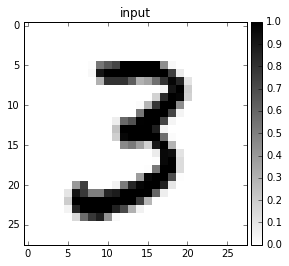

In [16]:
i = 4600

# Visualize the first layer of convolutions on an input image
X = X_test[i:i+1]

pl.figure()
pl.title('input')
nice_imshow(pl.gca(), np.squeeze(X), vmin=0, vmax=1, cmap=cm.binary)

In [17]:
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    imshape = imgs.shape[1:]
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in xrange(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    return mosaic

#pl.imshow(make_mosaic(np.random.random((9, 10, 10)), 3, 3, border=1))

W shape :  (32, 3, 3)


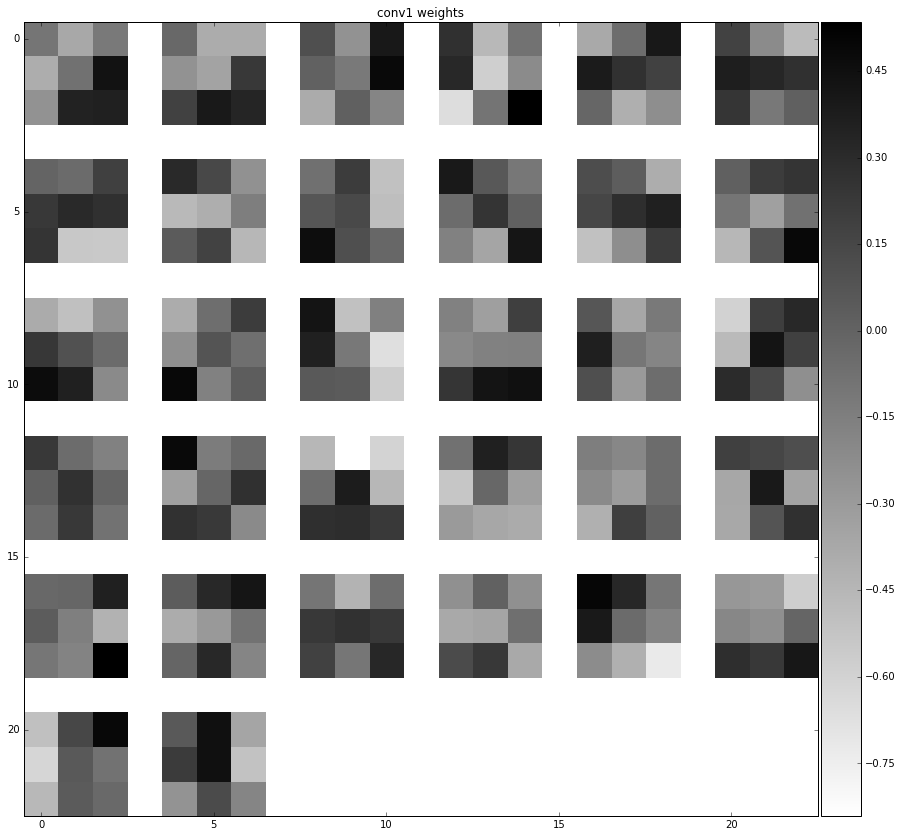

In [18]:
# Visualize weights
W = model.layers[0].W.get_value(borrow=True)
W = np.squeeze(W)
print("W shape : ", W.shape)

pl.figure(figsize=(15, 15))
pl.title('conv1 weights')
nice_imshow(pl.gca(), make_mosaic(W, 6, 6), cmap=cm.binary)

C1 shape :  (32, 26, 26)


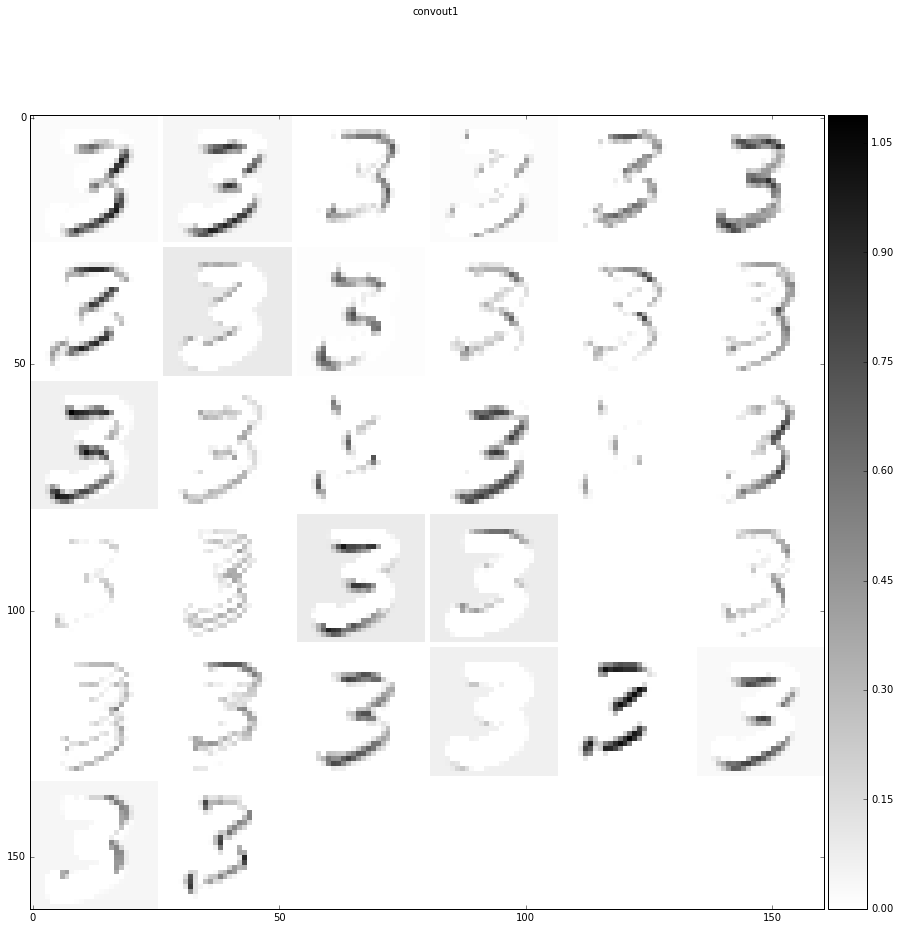

In [19]:
# Visualize convolution result (after activation)
C1 = convout1_f([X])
C1 = np.squeeze(C1)
print("C1 shape : ", C1.shape)

pl.figure(figsize=(15, 15))
pl.suptitle('convout1')
nice_imshow(pl.gca(), make_mosaic(C1, 6, 6), cmap=cm.binary)